In [1]:
!nvidia-smi

Sat Nov  9 09:29:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 299MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 58.6MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 58.1ms
Speed: 10.3ms preprocess, 58.1ms inference, 828.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


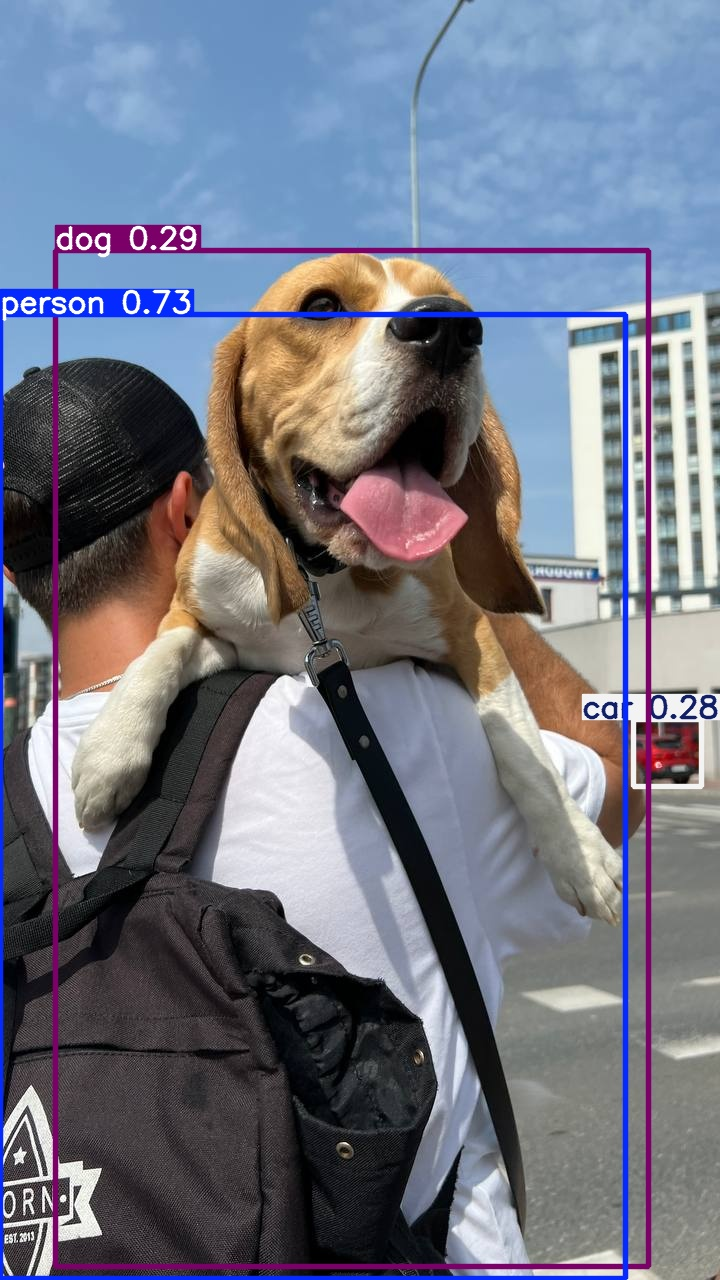

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [7]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 74.7ms
Speed: 5.0ms preprocess, 74.7ms inference, 1101.5ms postprocess per image at shape (1, 3, 640, 384)


In [8]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [9]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [10]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [13]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

import roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="nJZCVLp9E1cW2kYb1kOS")
project = rf.workspace("vision-dataset-ooxui").project("aquarium-dataset-zs3uh")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Aquarium-Dataset-1 in yolov8:: 100%|██████████| 2994/2994 [00:00<00:00, 4817.13it/s]


## Custom Training

In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 216MB/s]
New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Aquarium-Dataset-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fa

/content


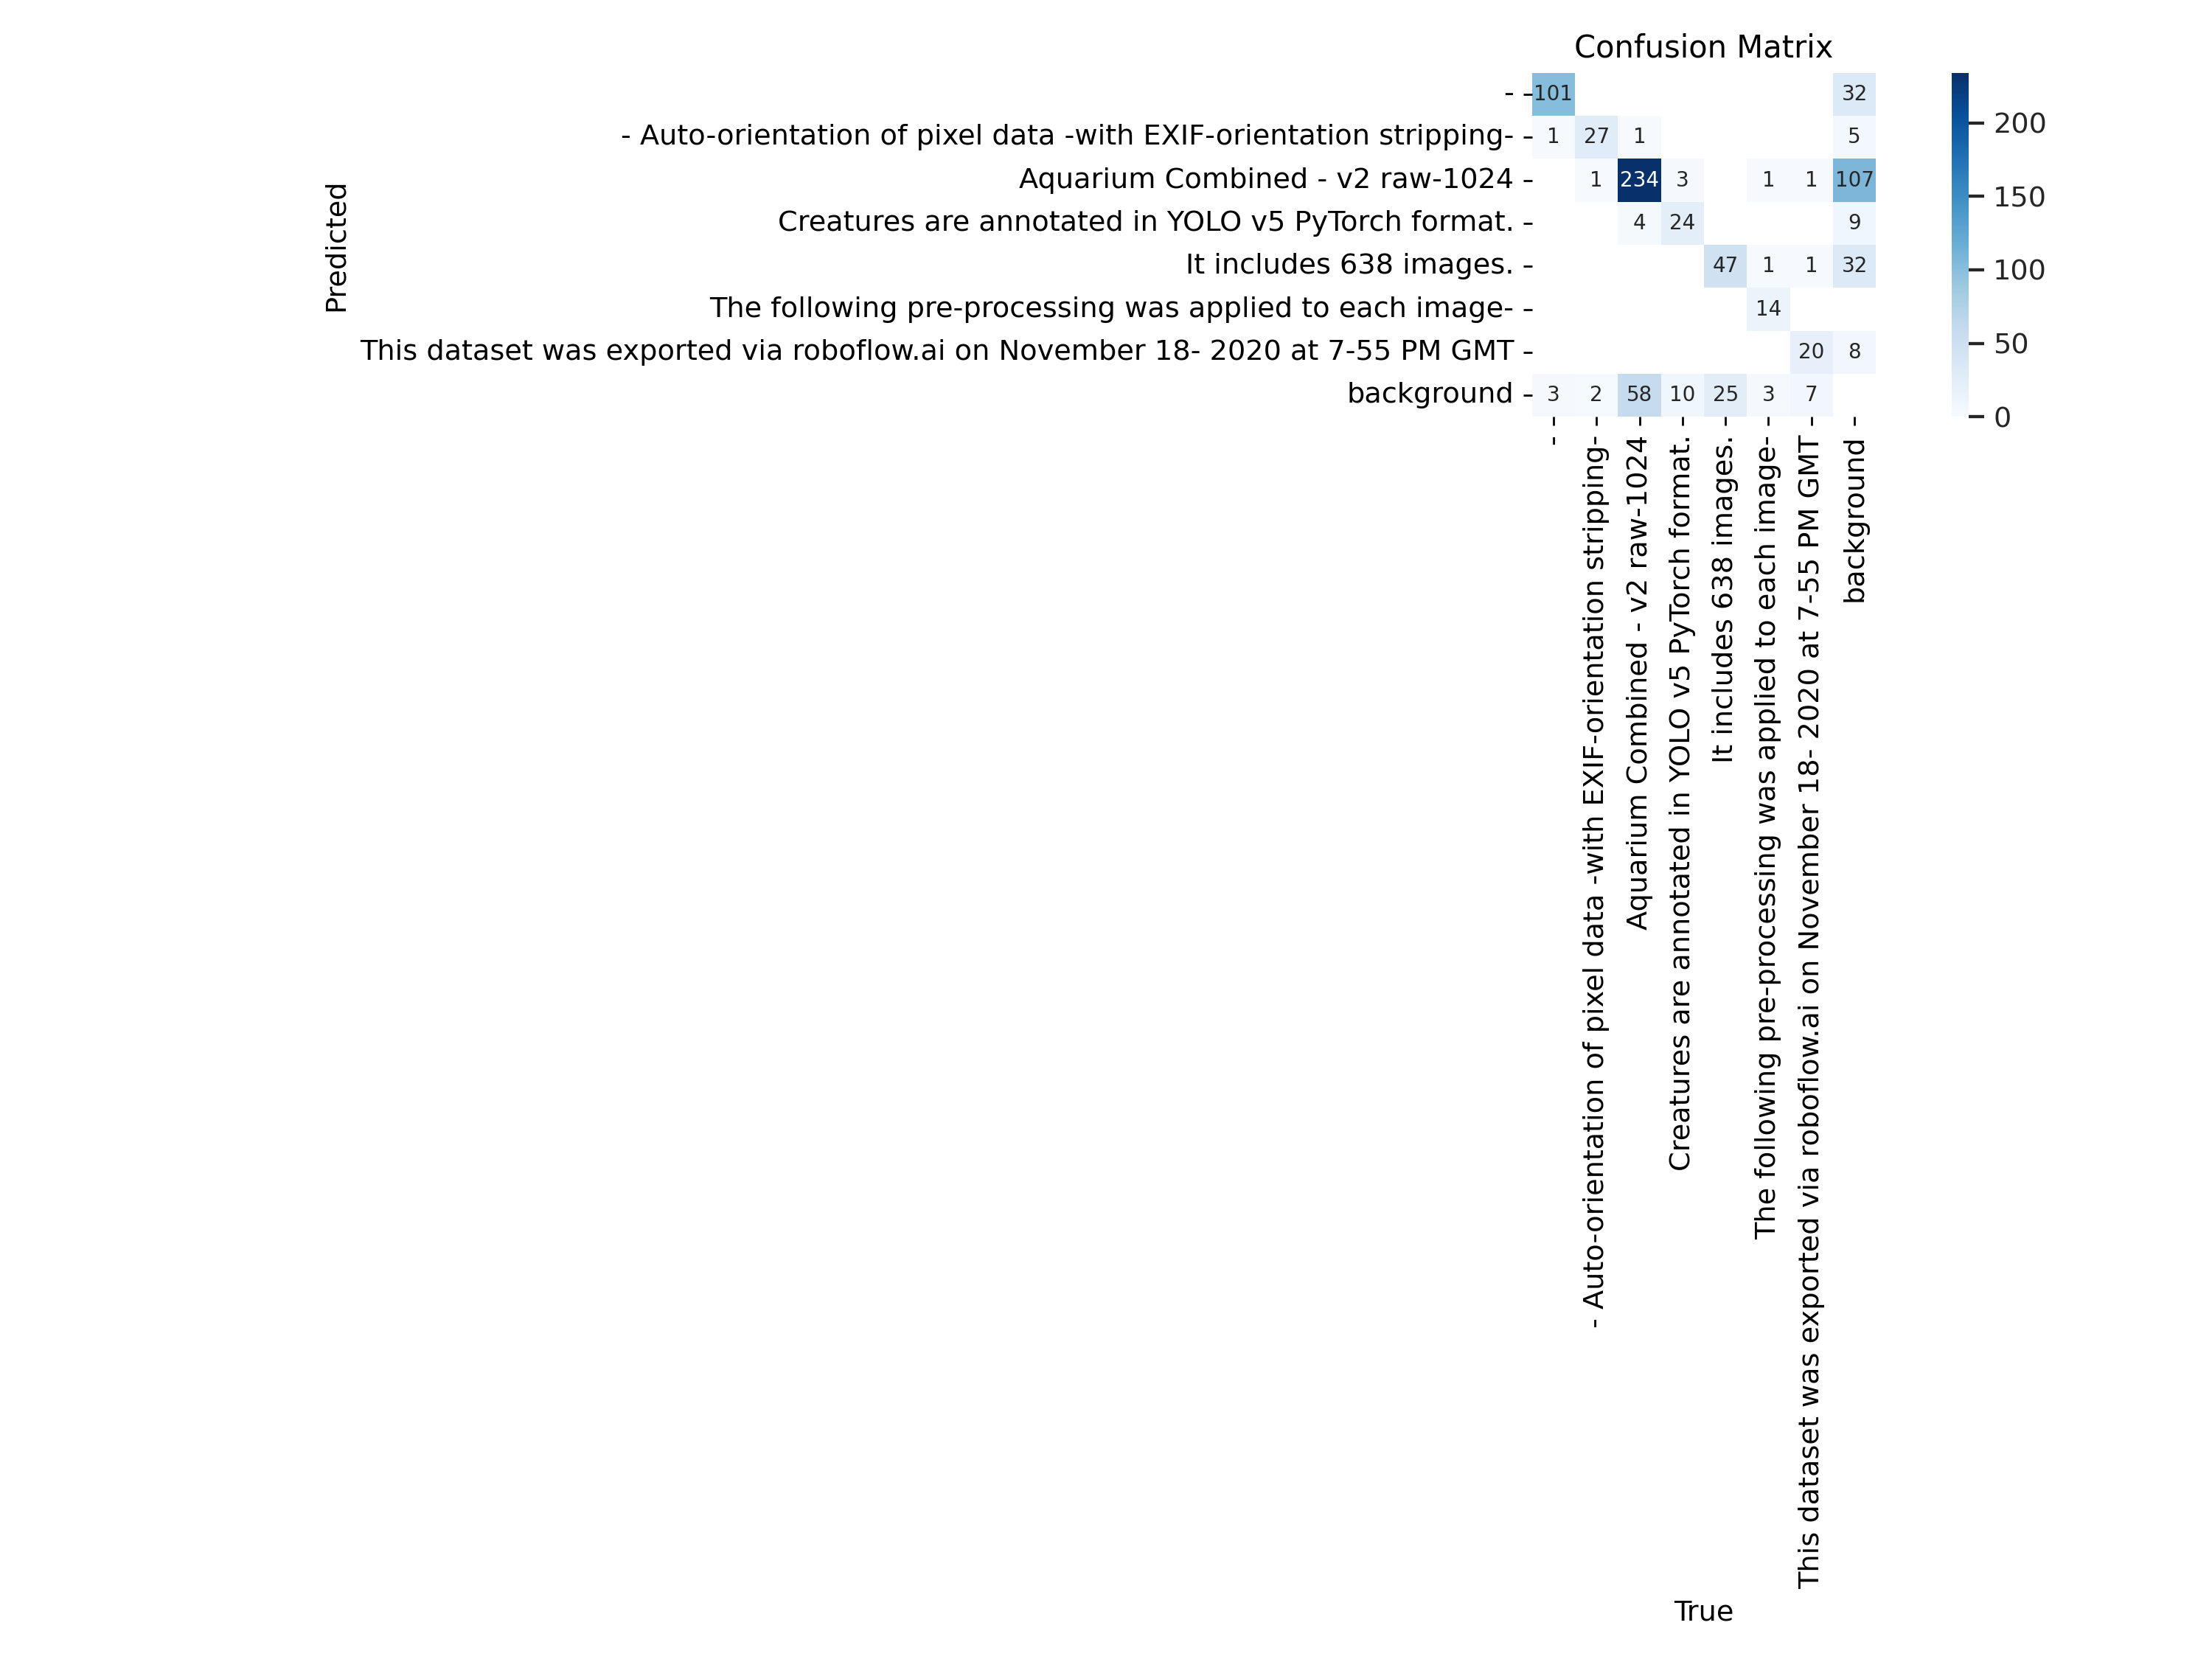

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


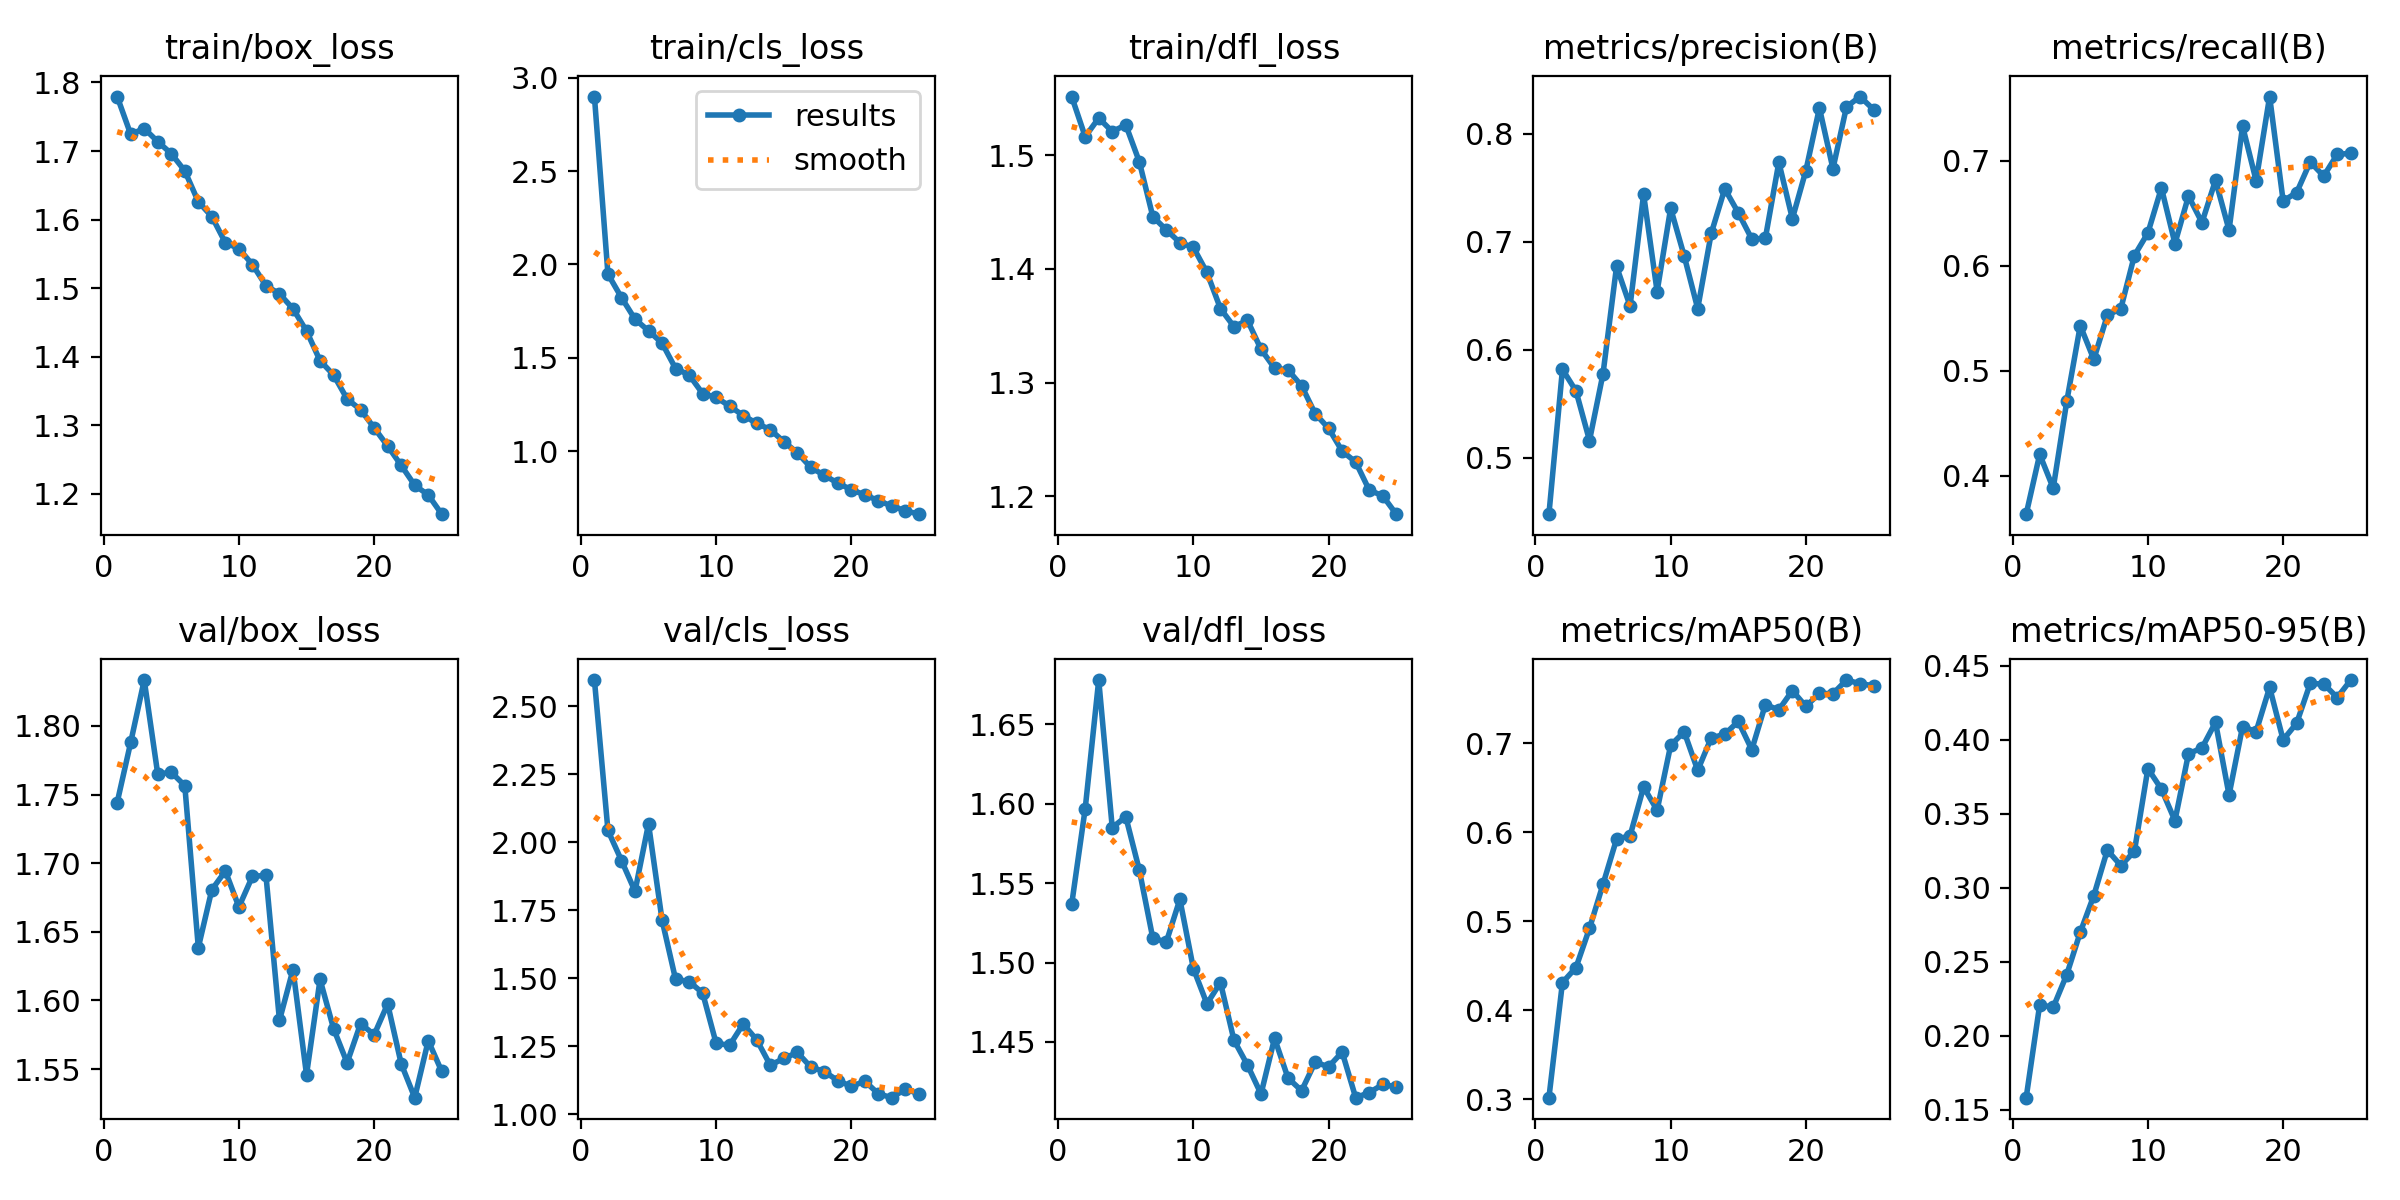

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


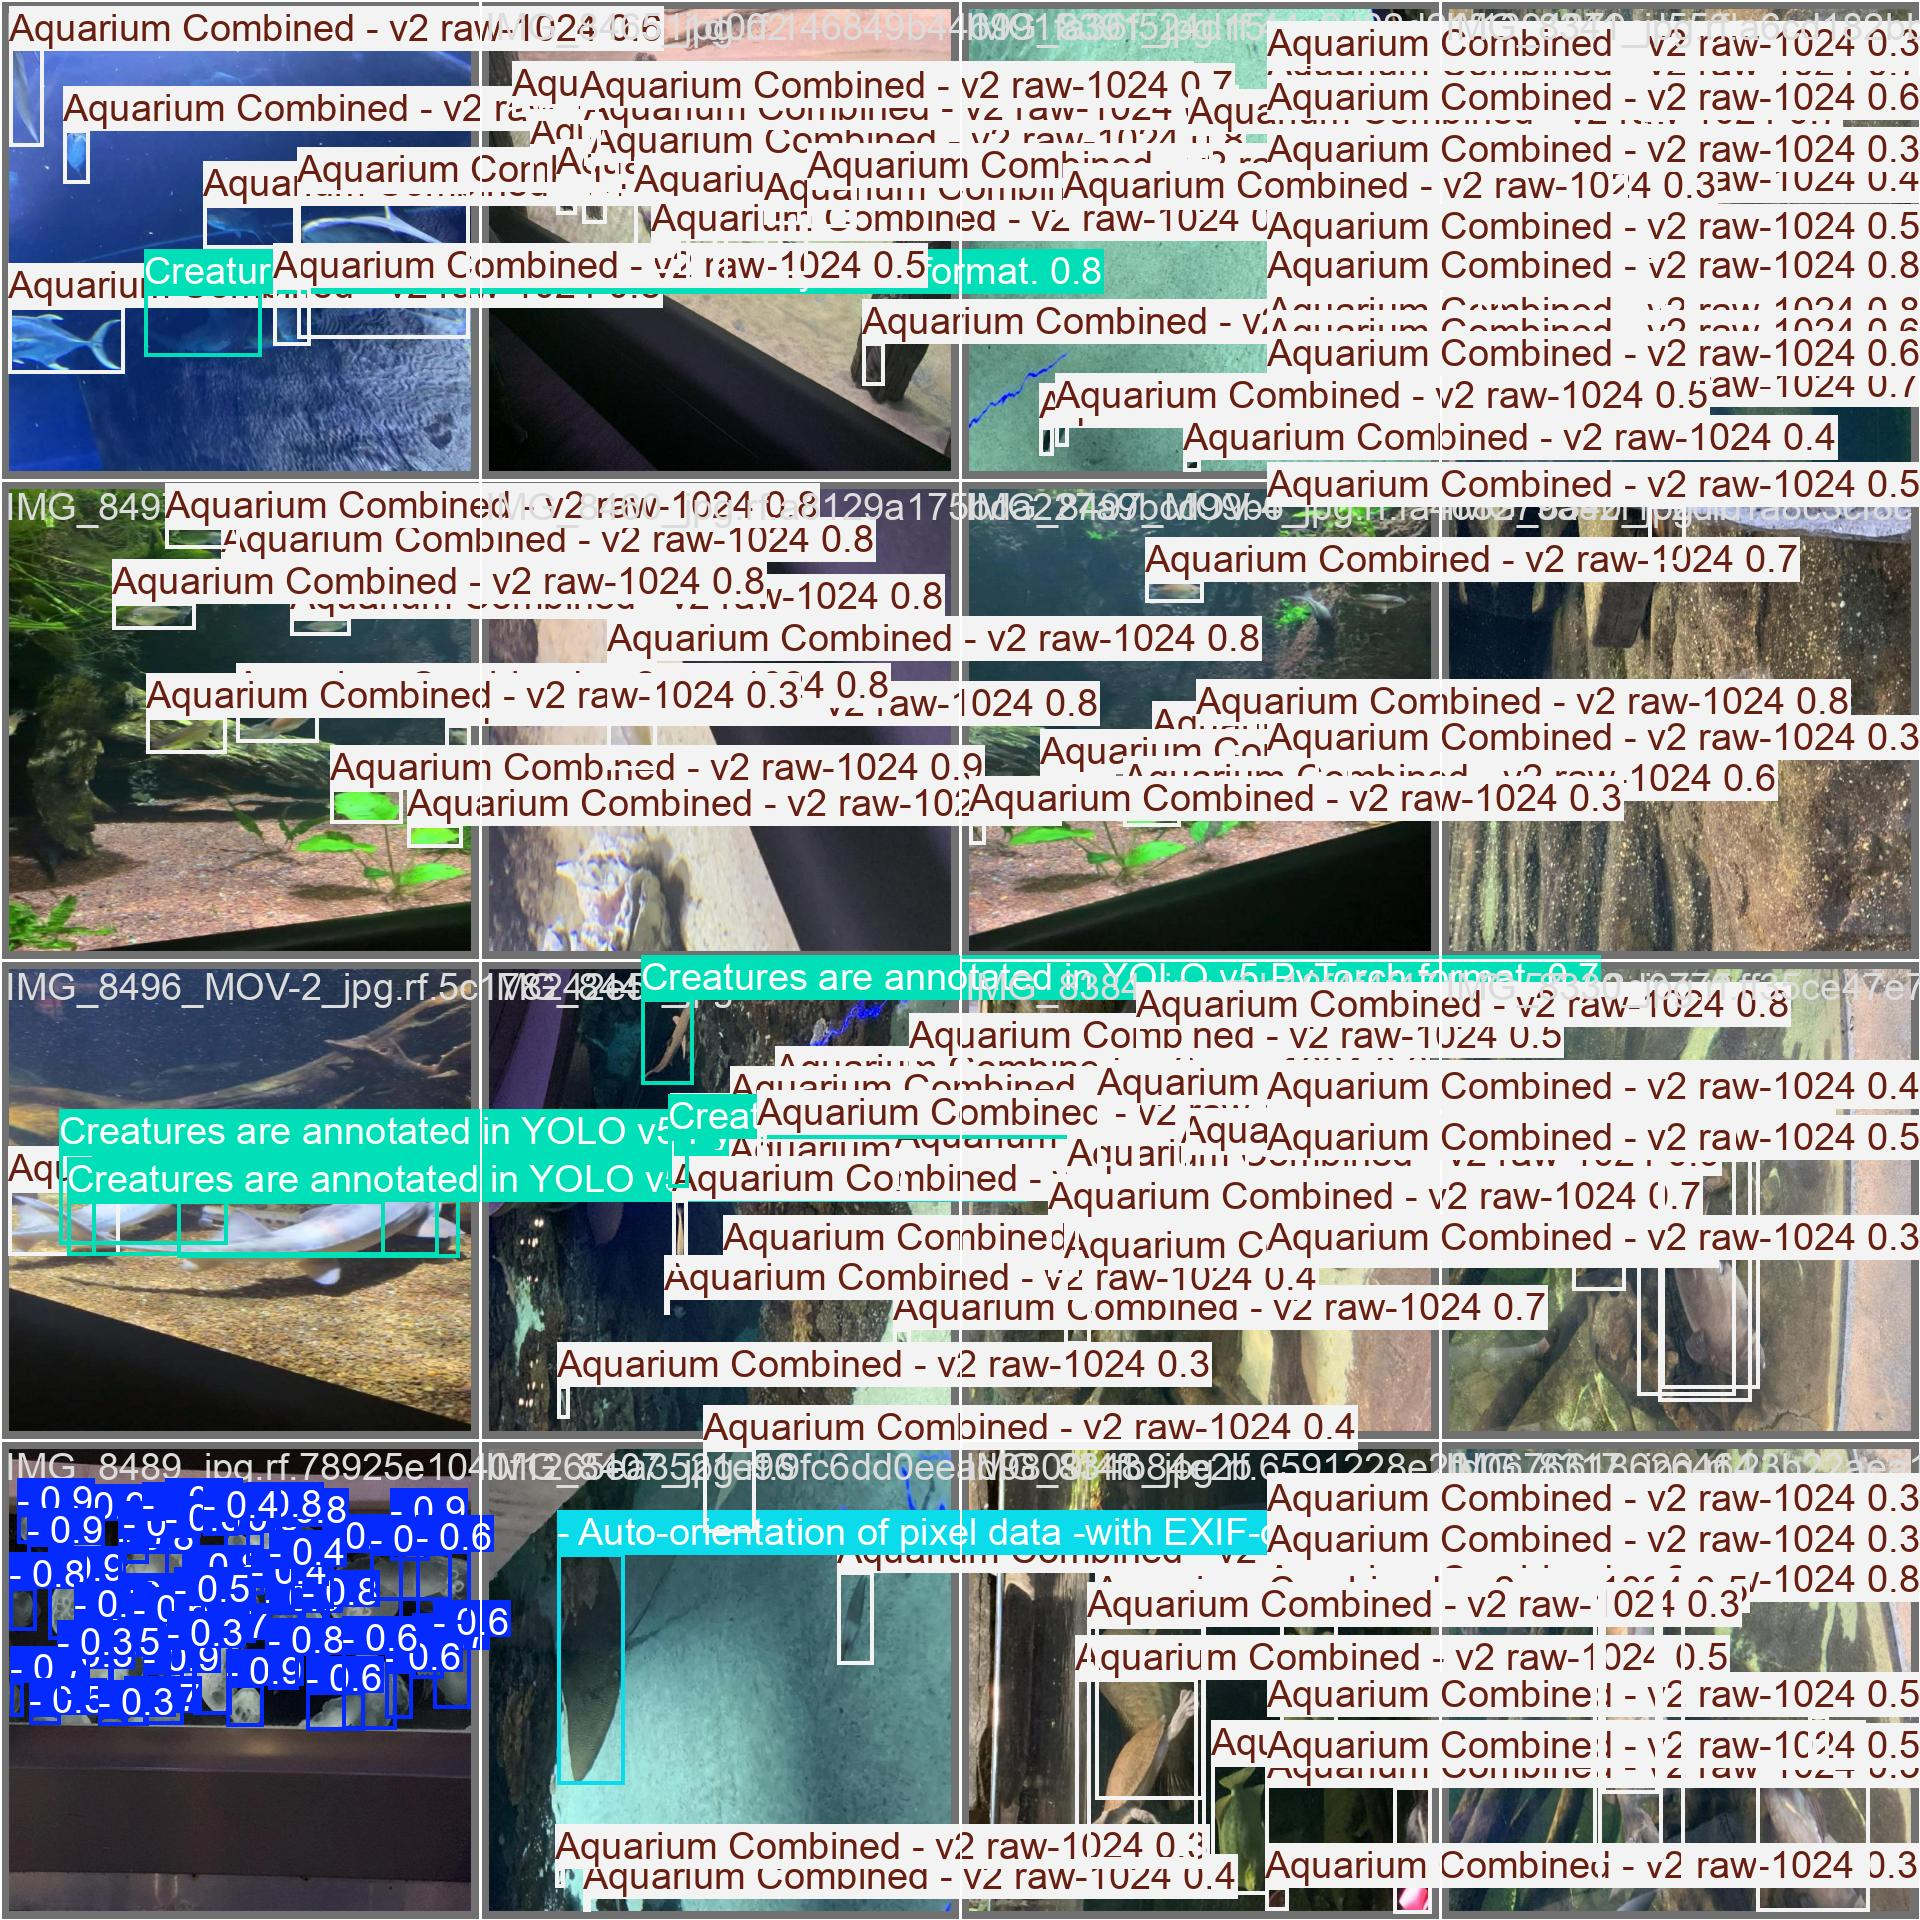

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [18]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Aquarium-Dataset-1/valid/labels.cache... 89 images, 0 backgrounds, 0 corrupt: 100% 89/89 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:05<00:00,  1.02it/s]
                   all         89        589      0.823      0.707      0.765      0.441
                     -          6        105      0.843      0.933      0.957      0.555
- Auto-orientation of pixel data -with EXIF-orientation stripping-         20         30      0.834       0.84       0.87      0.594
Aquarium Combined - v2 raw-1024         47        297      0.813       0.71      0.785      0.436
Creatures are annotated in YOLO v5 PyTorch format.         23         37        0.8      0.622      0.679      0.418
It includes 638 images.         

## Inference with Custom Model

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

image 1/63 /content/datasets/Aquarium-Dataset-1/test/images/IMG_2289_jpeg_jpg.rf.1ca8061d27013dbd49a644d4686cc7e8.jpg: 800x800 1 - Auto-orientation of pixel data -with EXIF-orientation stripping-, 22.9ms
image 2/63 /content/datasets/Aquarium-Dataset-1/test/images/IMG_2301_jpeg_jpg.rf.f75558e44e40e351c68a3353b56c8b24.jpg: 800x800 20 This dataset was exported via roboflow.ai on November 18- 2020 at 7-55 PM GMTs, 22.9ms
image 3/63 /content/datasets/Aquarium-Dataset-1/test/images/IMG_2319_jpeg_jpg.rf.fba1c862205e9a6a8da187e3b64a808a.jpg: 800x800 10 This dataset was exported via roboflow.ai on November 18- 2020 at 7-55 PM GMTs, 22.8ms
image 4/63 /content/datasets/Aquarium-Dataset-1/test/images/IMG_2347_jpeg_jpg.rf.3f98c740a702866fd1db71e2669caa70.jpg: 800x800 1 This dataset was exported via roboflow.ai on Novembe

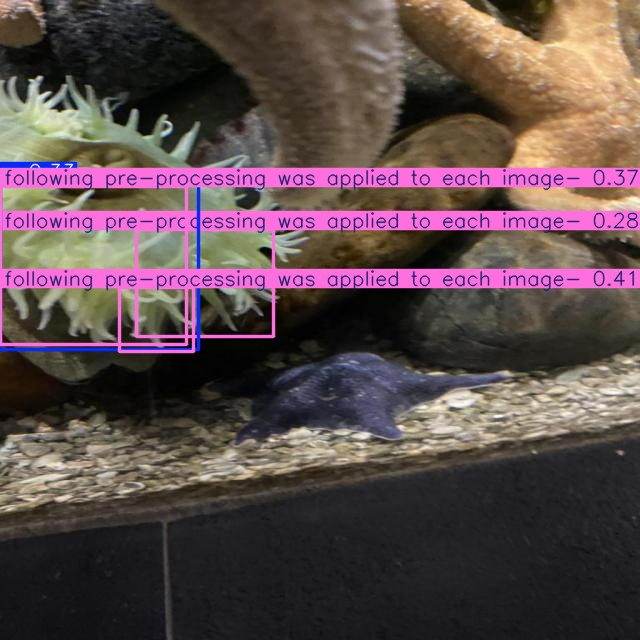

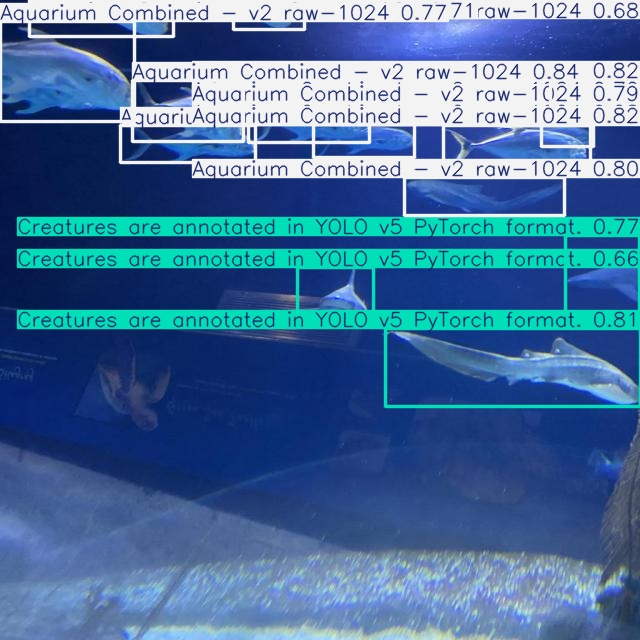

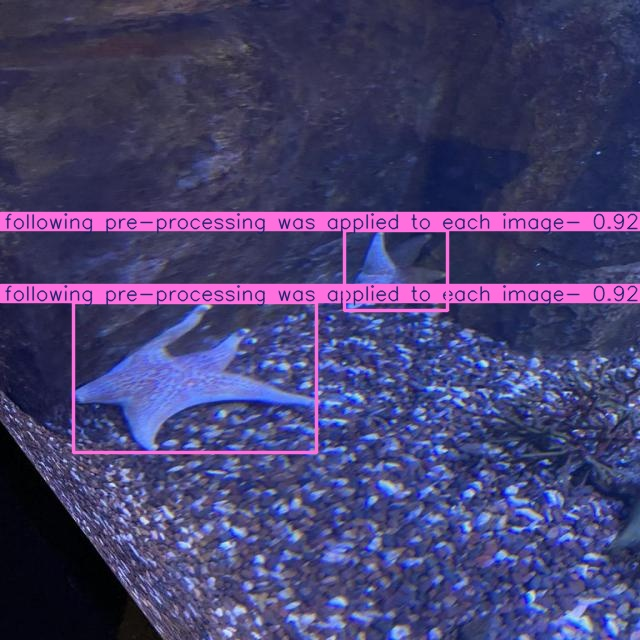

In [20]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# Answer to Question 1:
# Data Augmentation: For this model, we apply horizontal flips, random scaling, and color jitter.
# These augmentations help improve the model's robustness to variations in orientation and lighting,
# which are typical challenges in detecting objects from diverse angles and light conditions.

In [23]:
# Answer to Question 2:
# Epochs: The model is trained for 25 epochs. This was chosen to ensure sufficient learning
# on the dataset while balancing training time and preventing overfitting.

epochs = 25

In [ ]:
# Answer to Question 3:
# - Learning Rate (lr0): Set to 0.01 for stable convergence, a recommended default for YOLOv8.
# - Batch Size: Set to 16, balancing the available GPU memory and model performance.
# - Image Size (imgsz): Using 640x640, as it balances detection accuracy and computational efficiency.

batch_size = 16
img_size = 640
lr0 = 0.01


In [28]:
# Answer to Question 4:
# Metrics Analyzed:
# - mAP (Mean Average Precision): Provides an overall measure of model accuracy.
# - Precision: Percentage of correct positive predictions among all positive predictions.
# - Recall: Percentage of correct positive predictions among all actual positives.
# Concrete Results: (These values will vary based on the actual training output.)